In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data = pd.read_csv('resnet18_eval.csv')
data.head(10)

test  batch  image size  epoch  + accuracy  - accuracy  \
0         learning_test      4           7     10      0.9374      1.0000   
1       part_whole_test      4           7     10      0.9405      0.9988   
2           global_test      4           7     10      0.8735      0.9926   
3        composite_test      4           7     10      0.6003      0.9986   
4  part_whole_flip_test      4           7     10      0.8991      0.9996   
5         learning_test      4          14     10      1.0000      1.0000   
6       part_whole_test      4          14     10      0.9999      1.0000   
7           global_test      4          14     10      0.9999      0.9997   
8        composite_test      4          14     10      0.9997      0.9998   
9  part_whole_flip_test      4          14     10      0.9977      1.0000   

   avg accuracy  resize contrast reduce  \
0       0.96870     0.5            1-20   
1       0.96965     0.5            1-20   
2       0.93305     0.5            1-20   
3       0.79945     0.5            1-20   
4       0.94935     0.5            1-20   
5       1.00000     0.5            1-20   
6       0.99995     0.5            1-20   
7       0.99980     0.5            1-20   
8       0.99975     0.5            1-20   
9       0.99885     0.5            1-20   

                                       model weights  
0  resnet18_is7_bs4_e10_i10000_resize0.5_contrast...  
1  resnet18_is7_bs4_e10_i10000_resize0.5_contrast...  
2  resnet18_is7_bs4_e10_i10000_resize0.5_contrast...  
3  resnet18_is7_bs4_e10_i10000_resize0.5_contrast...  
4  resnet18_is7_bs4_e10_i10000_resize0.5_contrast...  
5  resnet18_is14_bs4_e10_i10000_resize0.5_contras...  
6  resnet18_is14_bs4_e10_i10000_resize0.5_contras...  
7  resnet18_is14_bs4_e10_i10000_resize0.5_contras...  
8  resnet18_is14_bs4_e10_i10000_resize0.5_contras...  
9  resnet18_is14_bs4_e10_i10000_resize0.5_contras...

In [3]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [17]:
test_list = data['test'].unique().tolist()[:5]
image_size_list = data['image size'].unique().tolist()
contract_reduce_list = data['contrast reduce'].unique().tolist()

print(test_list)
print(image_size_list)
print(contract_reduce_list)

['learning_test', 'part_whole_test', 'global_test', 'composite_test', 'part_whole_flip_test']
[7, 14, 28, 56, 112, 224, 336, 448, 4, 3, 2]
['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200']


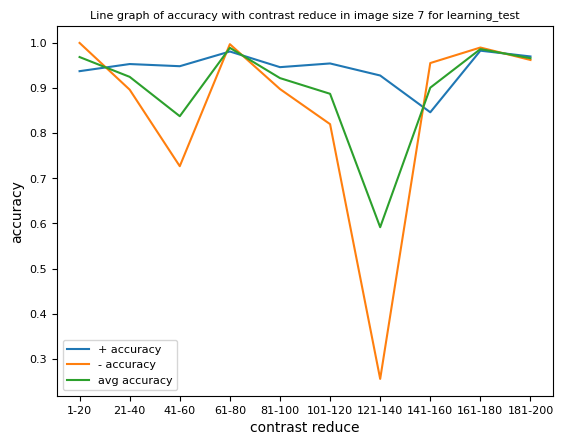

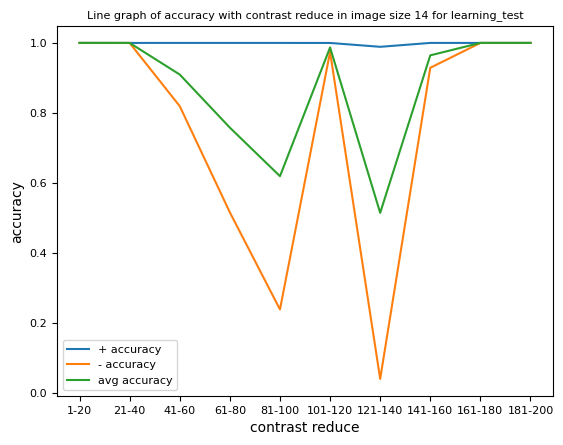

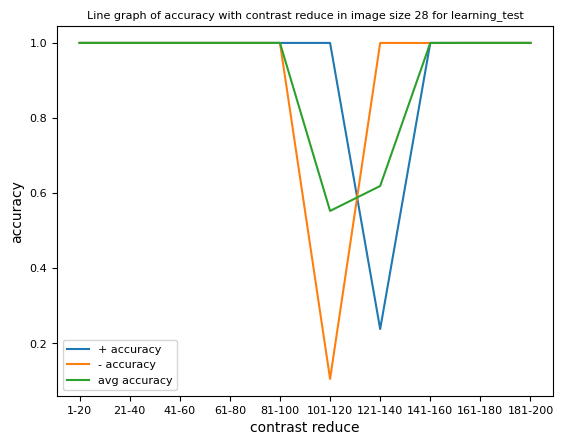

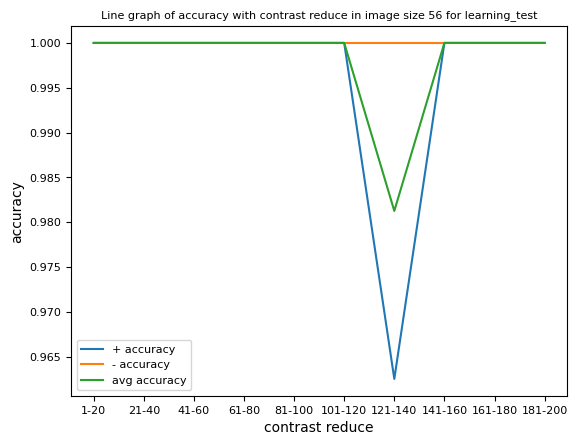

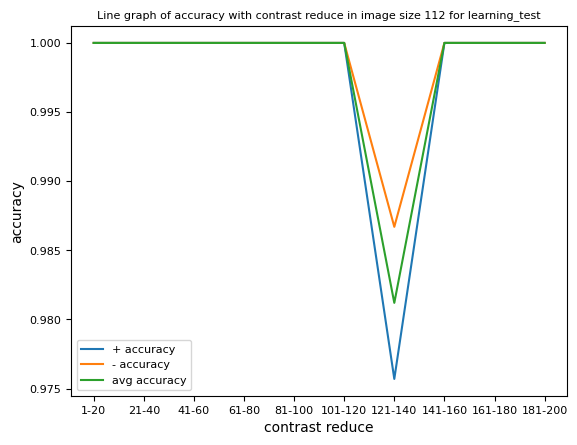

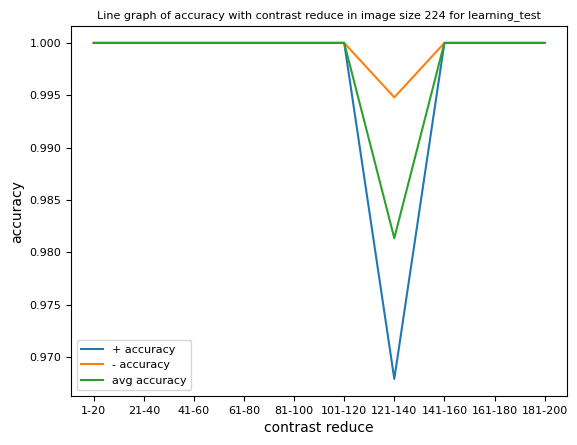

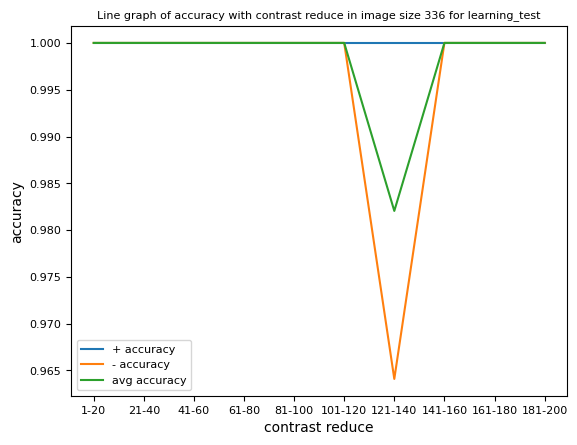

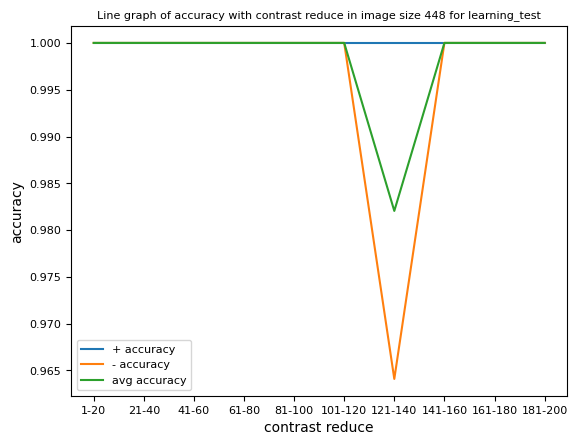

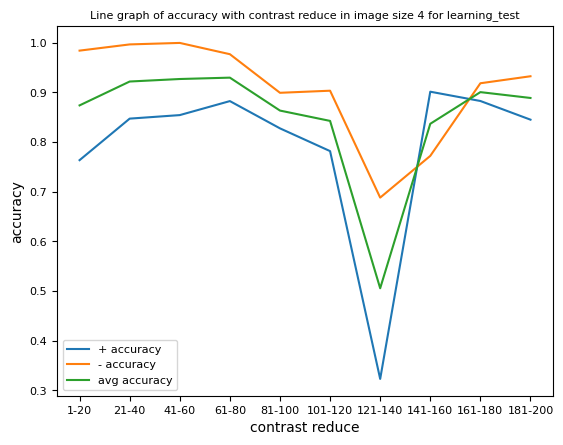

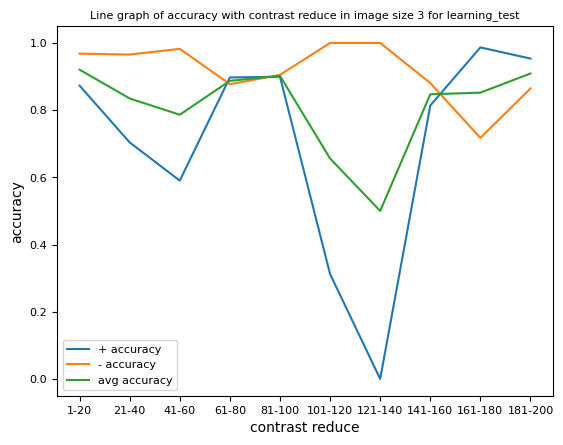

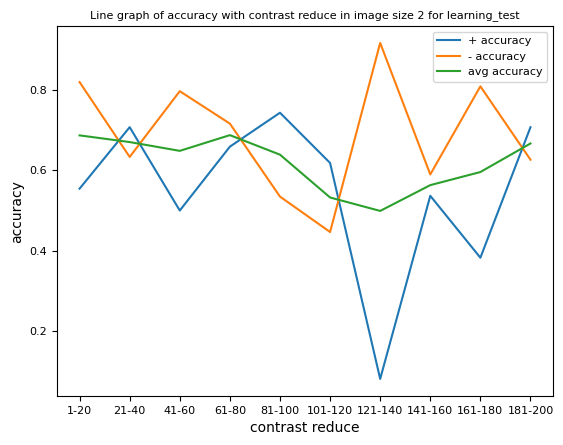

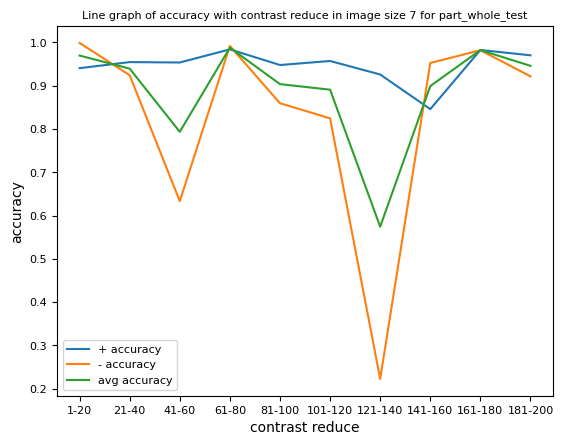

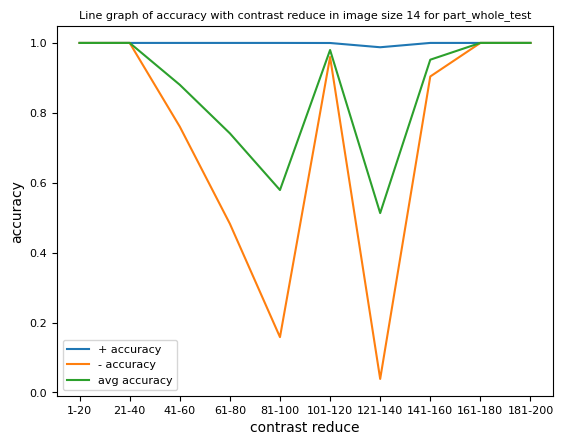

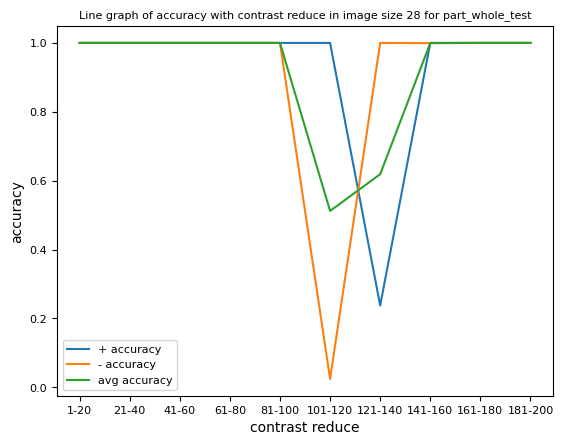

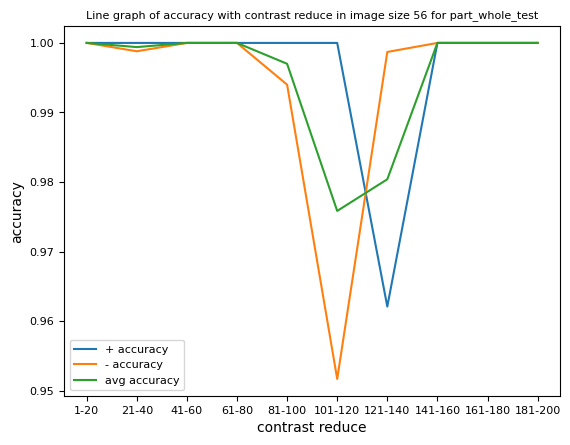

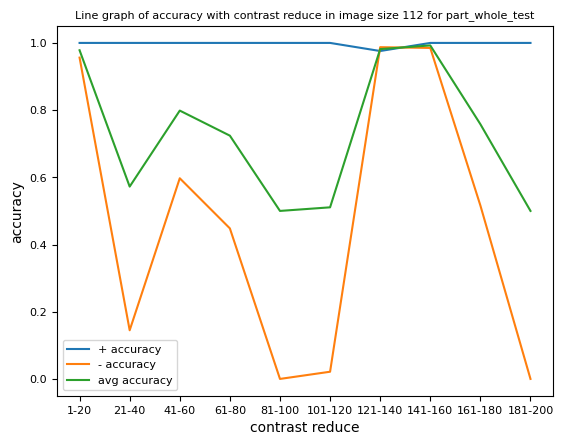

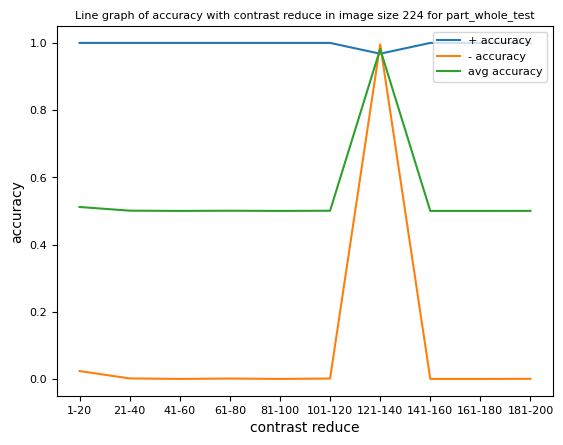

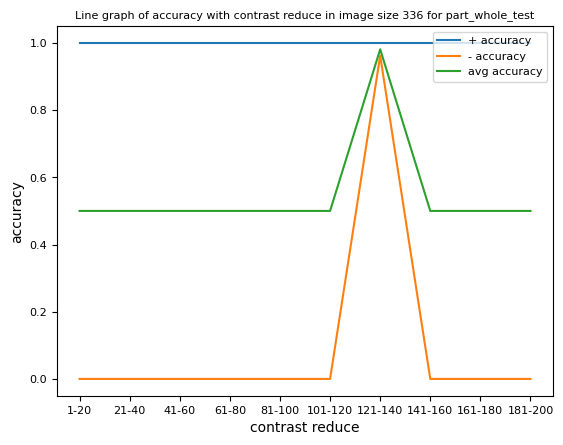

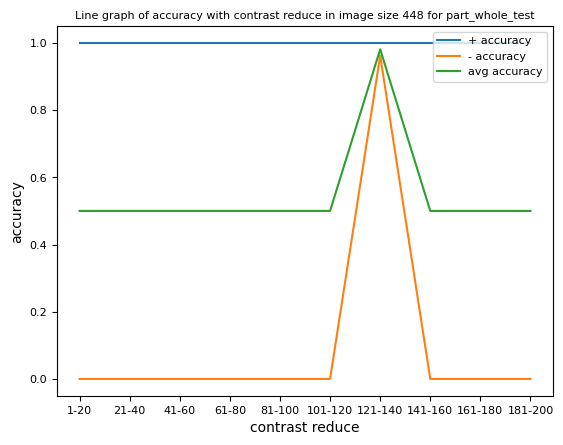

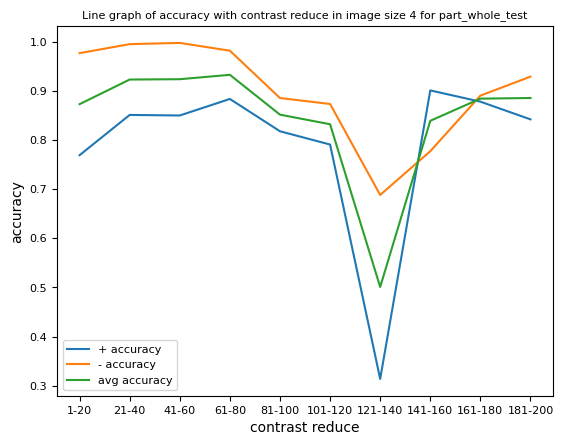

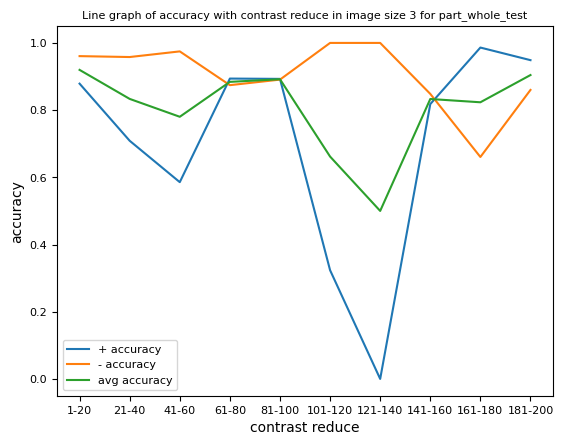

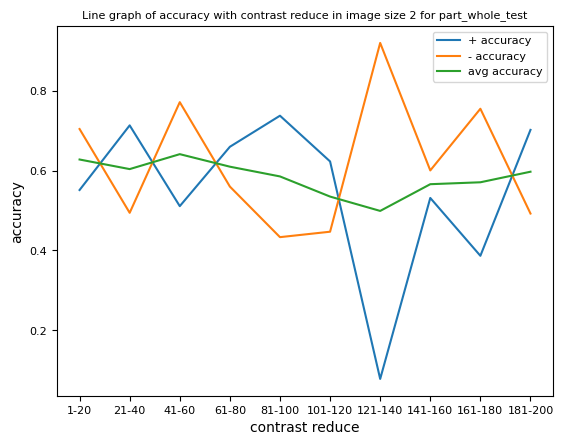

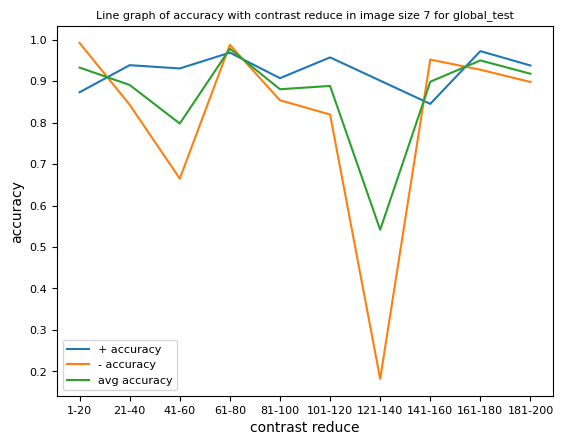

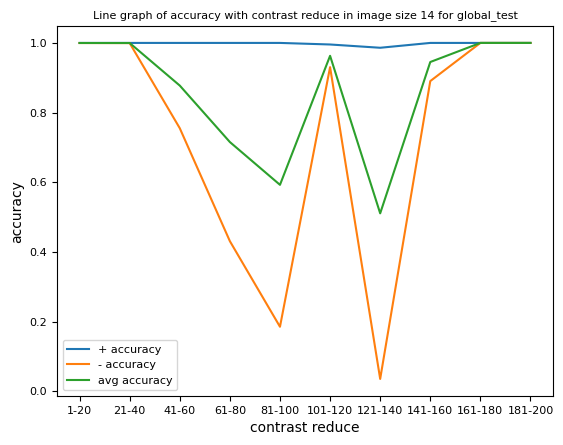

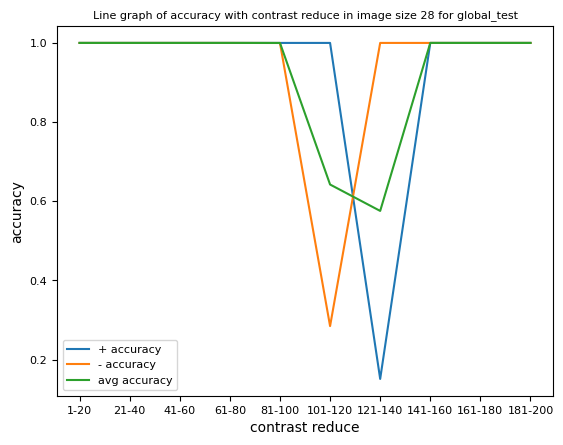

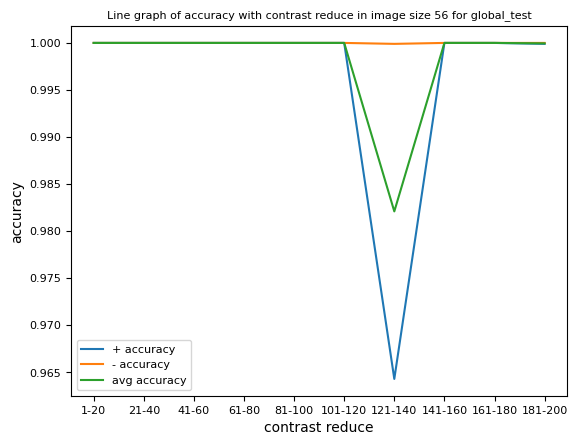

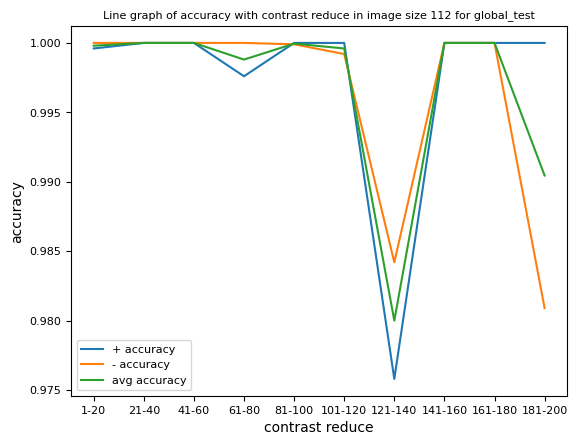

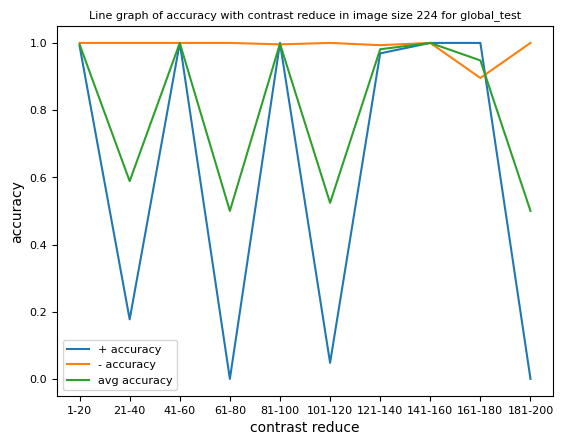

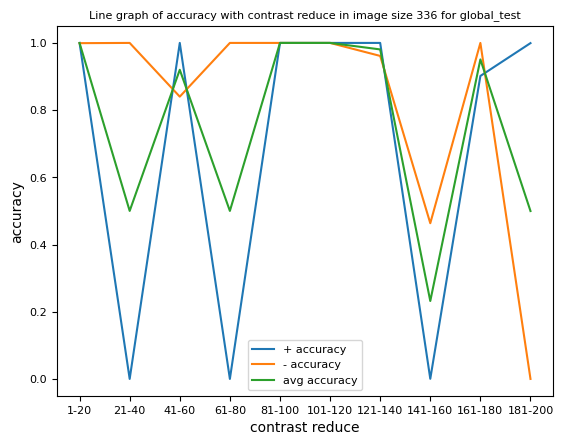

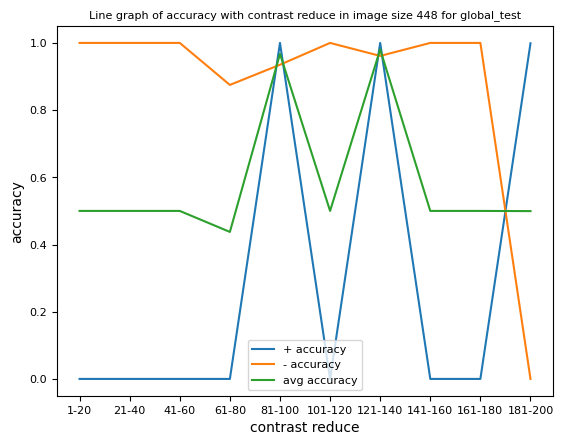

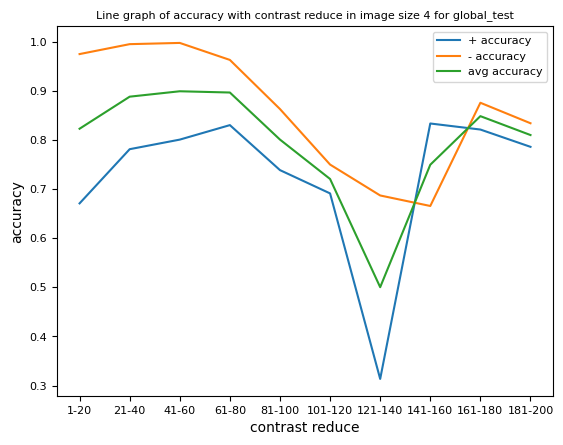

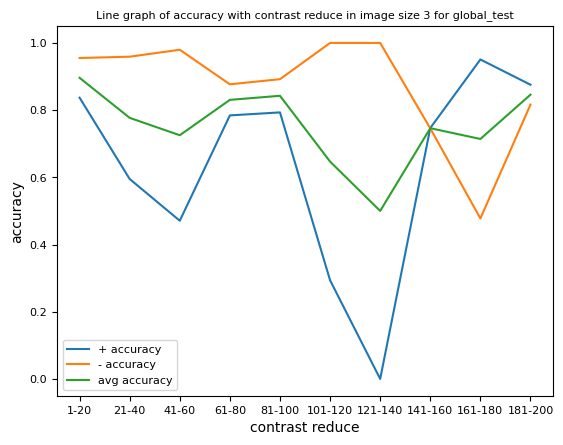

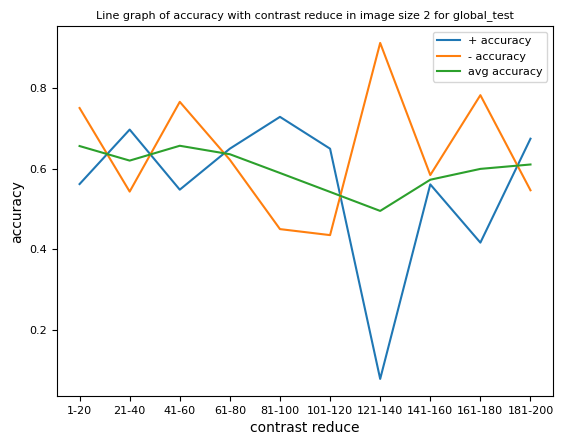

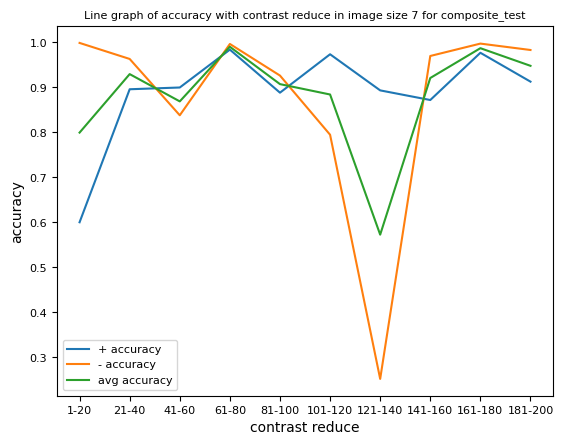

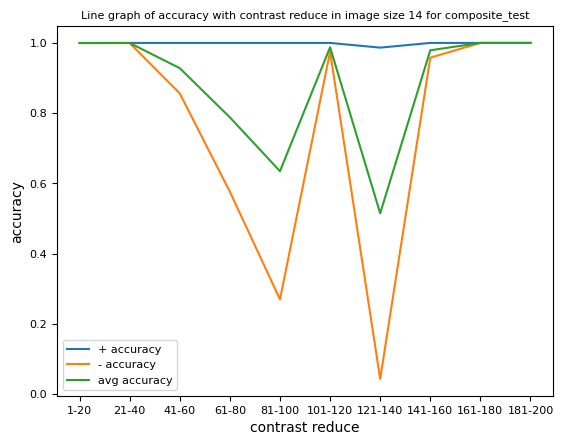

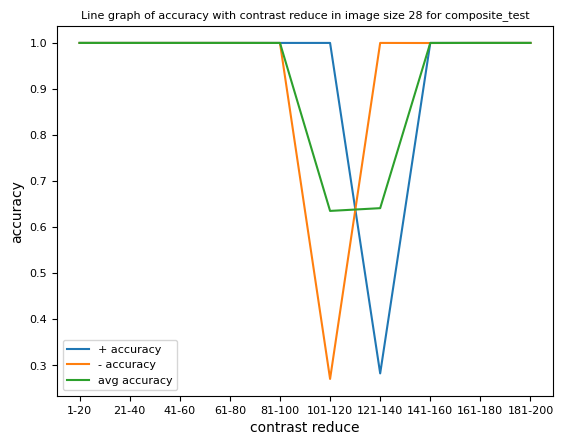

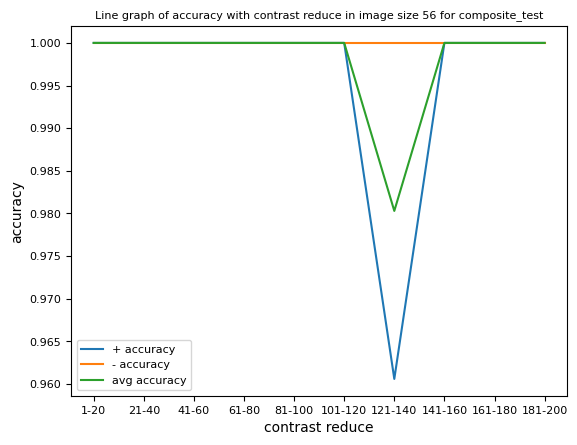

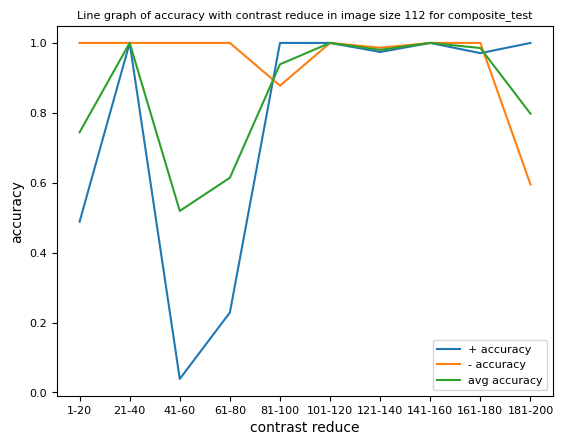

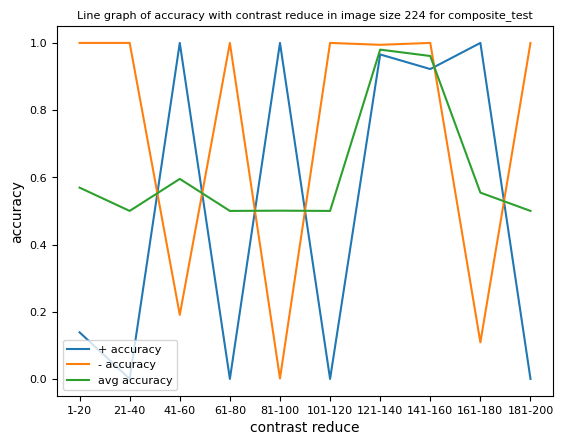

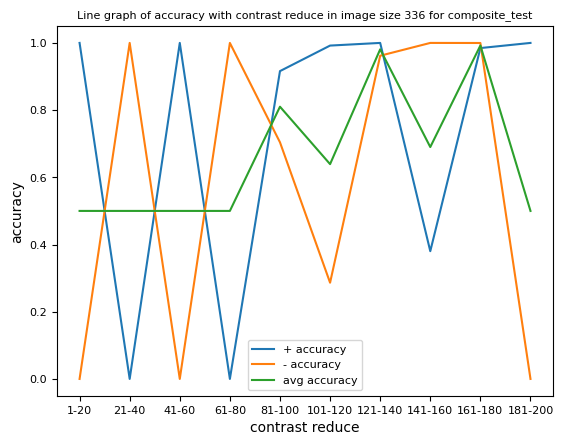

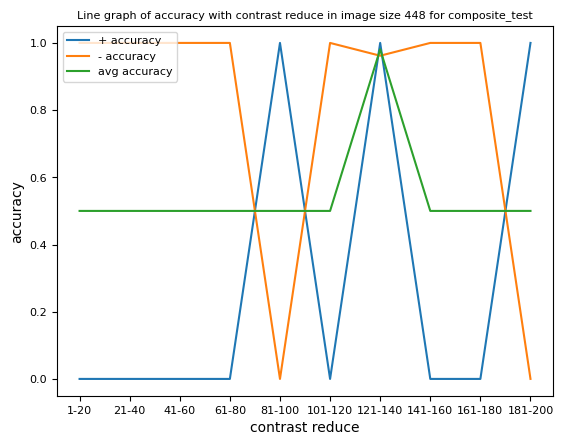

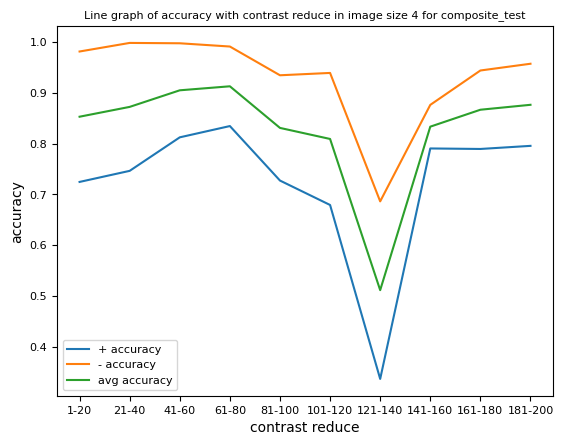

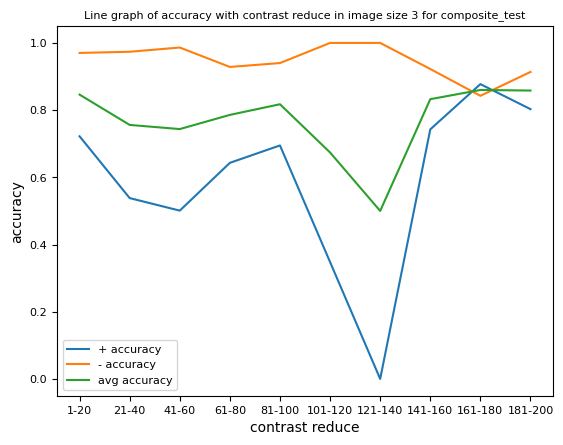

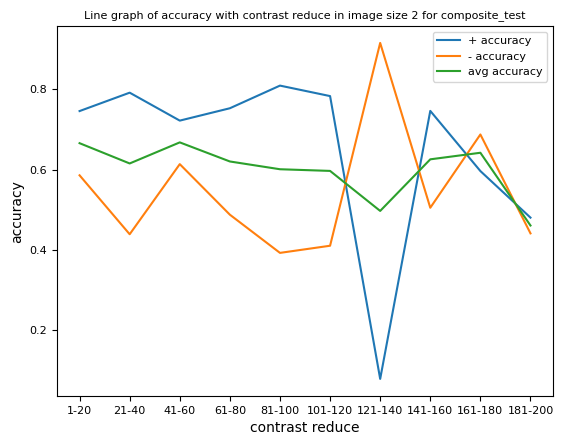

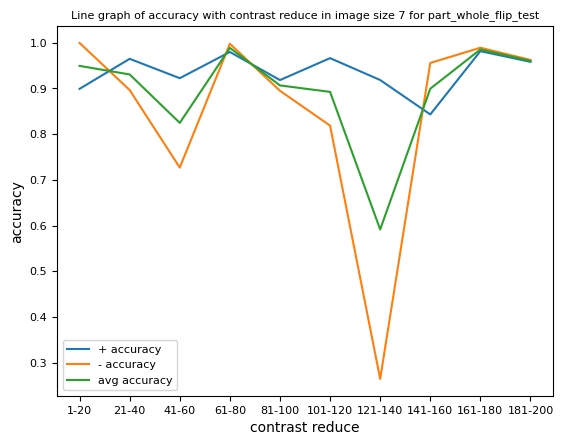

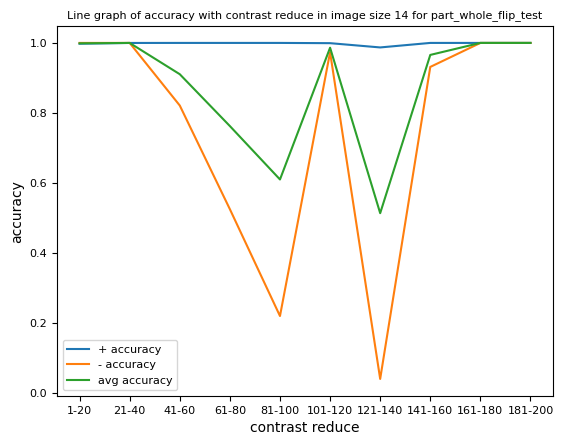

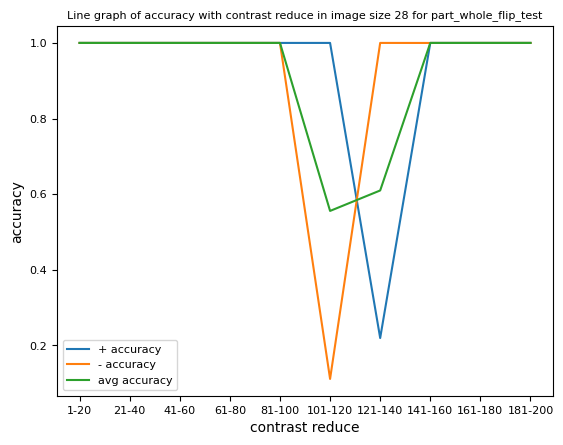

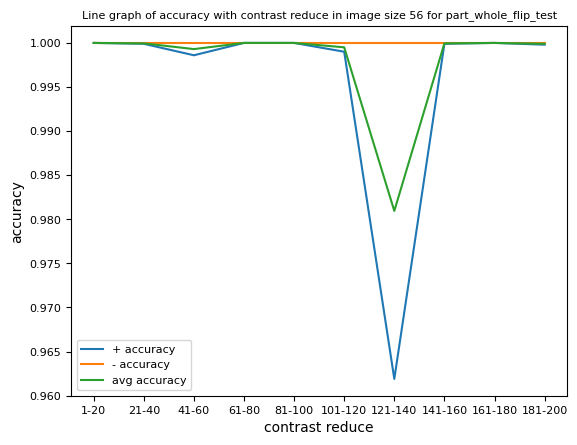

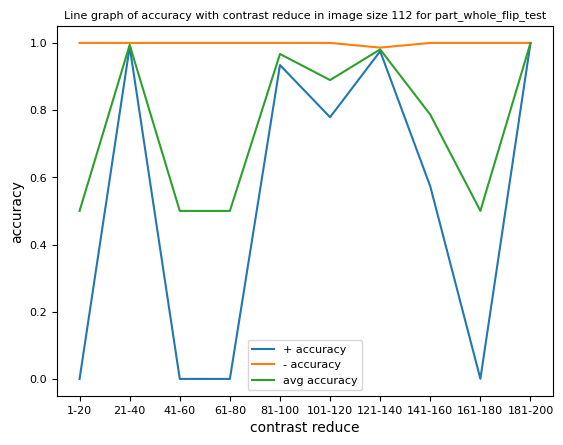

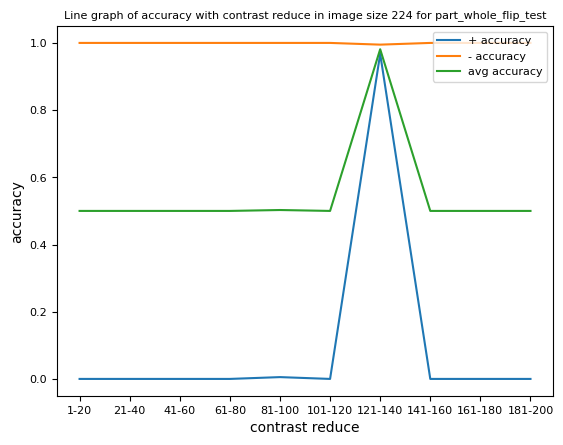

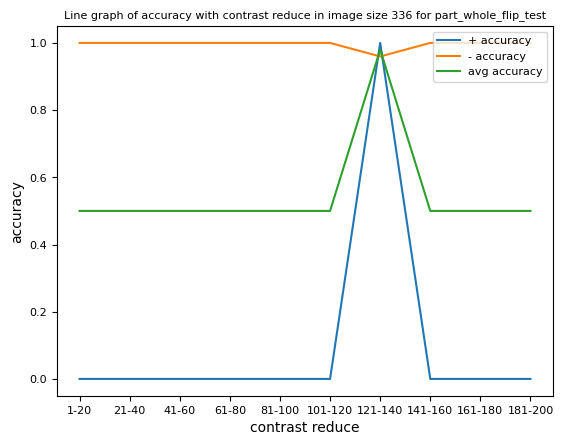

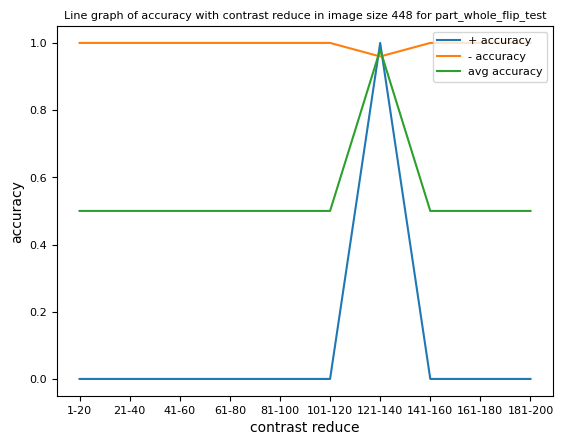

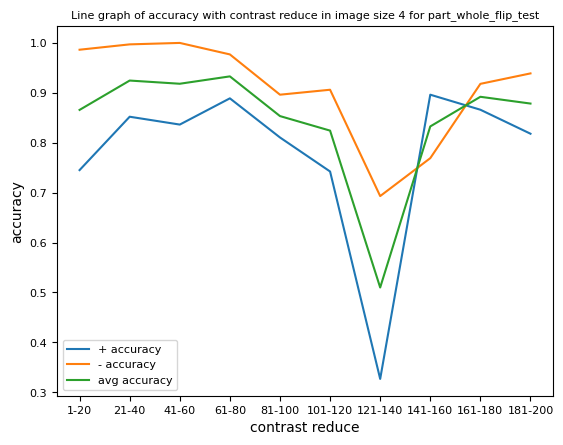

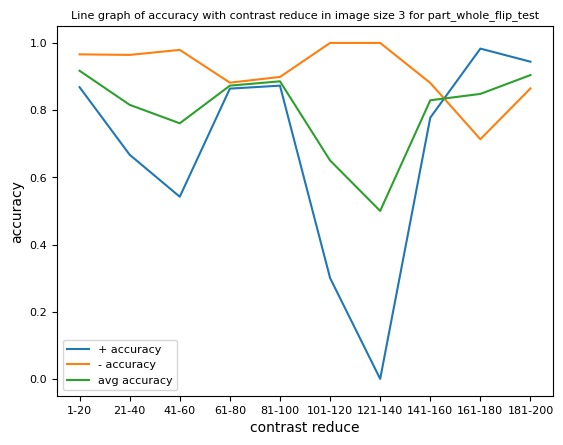

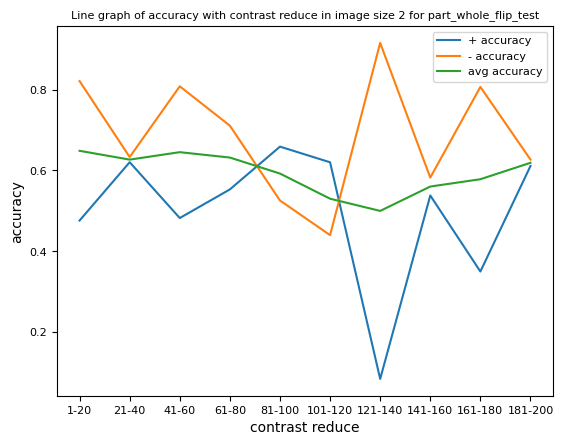

In [18]:
output_folder = "analysis_visual/resnet18/origin_data/contrast_reduce/"
Path(output_folder).mkdir(parents=True, exist_ok=True)
for test in test_list:
    for image_size in image_size_list:
        test_image_size_data = data[(data.test == test) & (data['image size'] == image_size)]
        # plt.plot(test_image_size_data['contract reduce'], test_image_size_data['+ accuracy'], label= f'image size = {image_size}')
        plt.plot(test_image_size_data['contrast reduce'], test_image_size_data['+ accuracy'], label= '+ accuracy')
        plt.plot(test_image_size_data['contrast reduce'], test_image_size_data['- accuracy'], label= '- accuracy')
        plt.plot(test_image_size_data['contrast reduce'], test_image_size_data['avg accuracy'], label= 'avg accuracy')
        plt.xlabel('contrast reduce') 
        plt.ylabel('accuracy') 
        plt.title(f"Line graph of accuracy with contrast reduce in image size {image_size} for {test}")
        plt.legend()
        output_path = output_folder+f"resnet18_{test}_is{image_size}_bs4_e10_resize0.5.png"
        plt.savefig(output_path)
        plt.show()

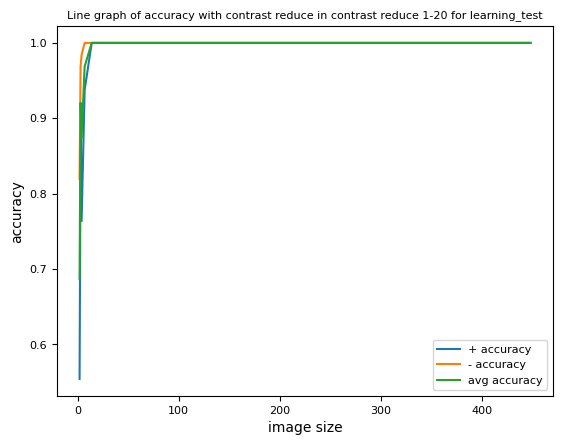

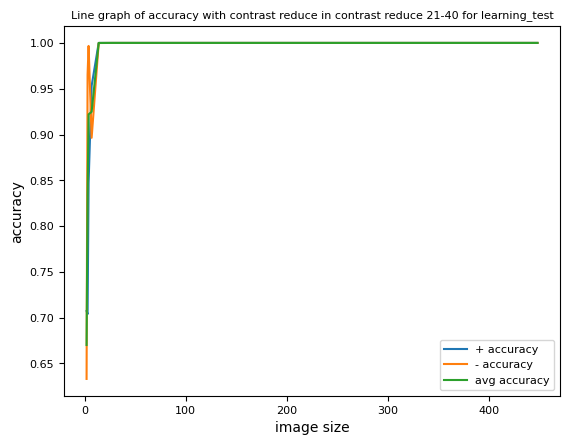

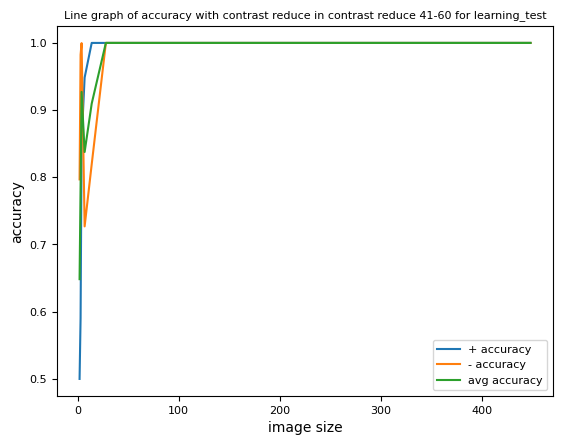

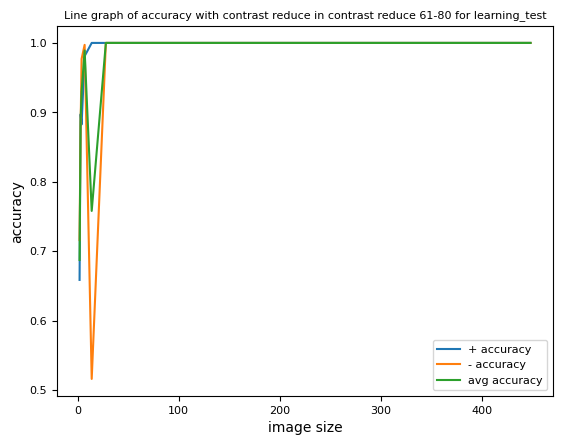

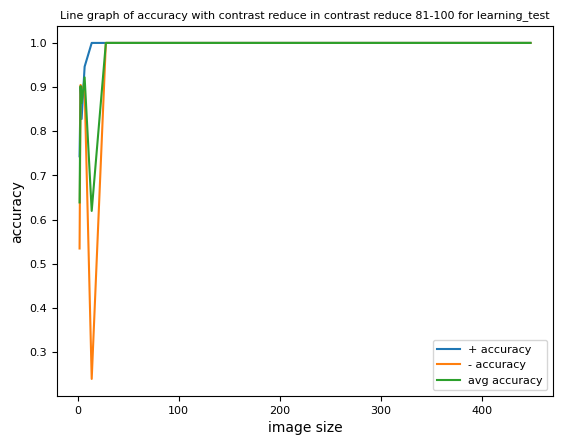

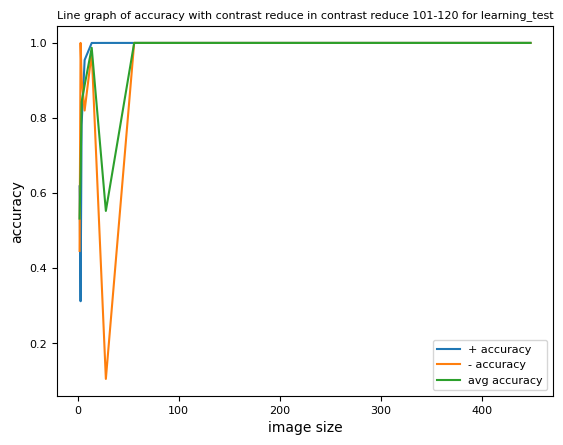

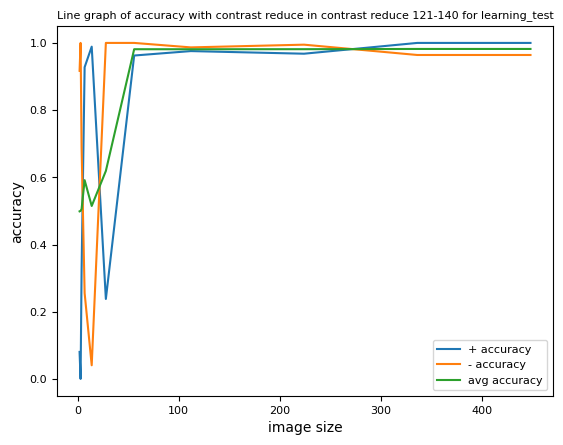

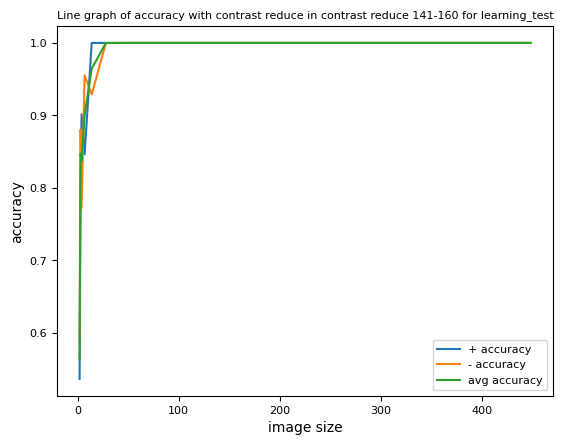

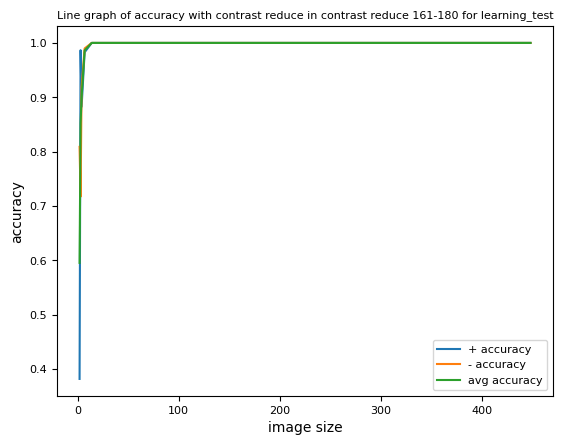

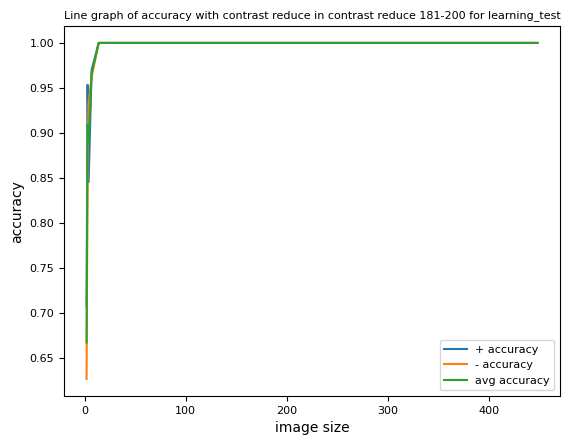

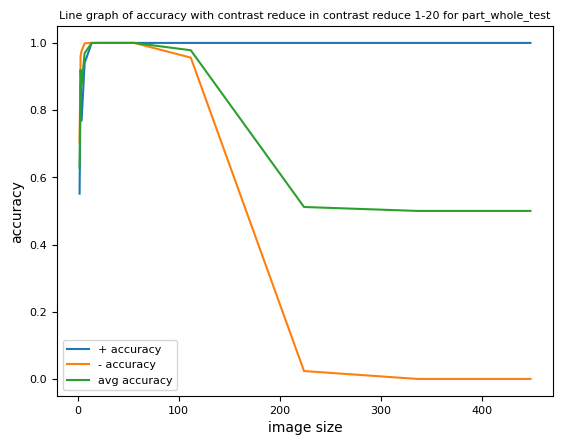

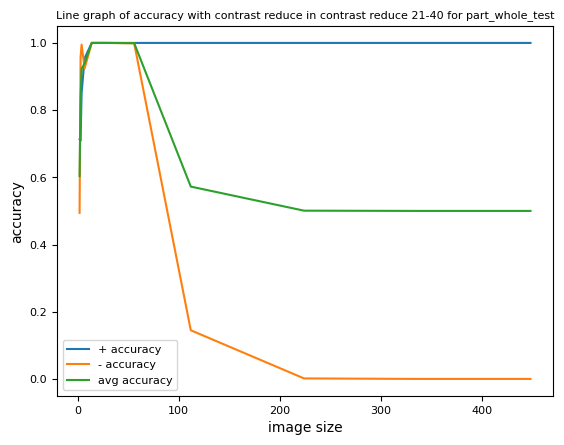

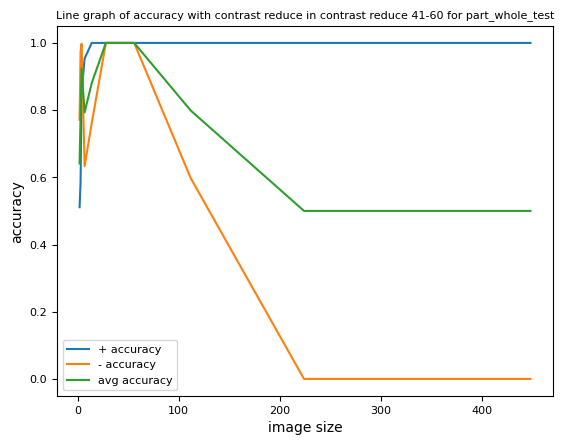

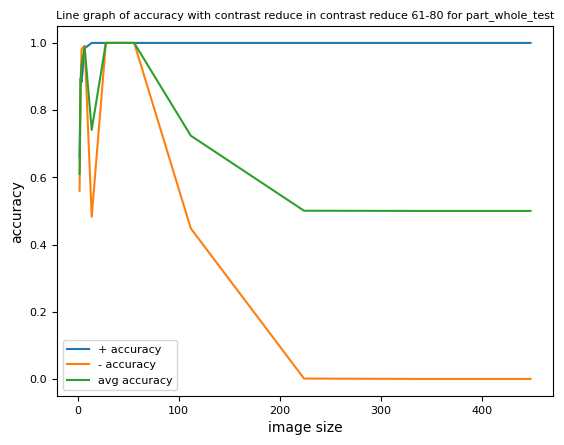

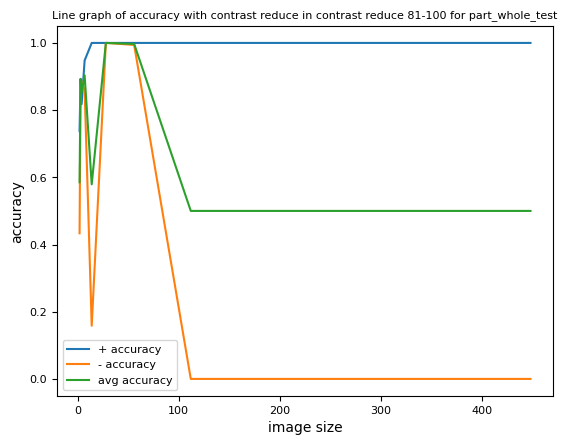

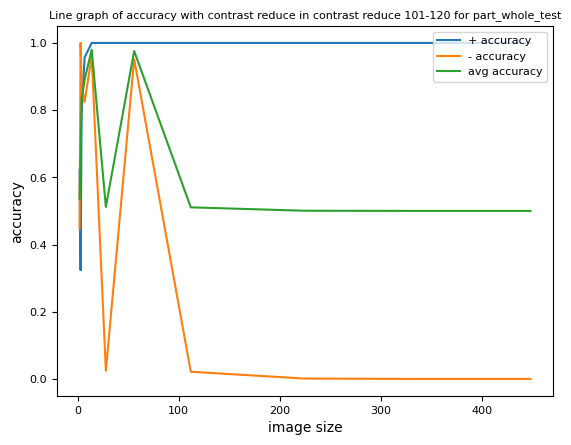

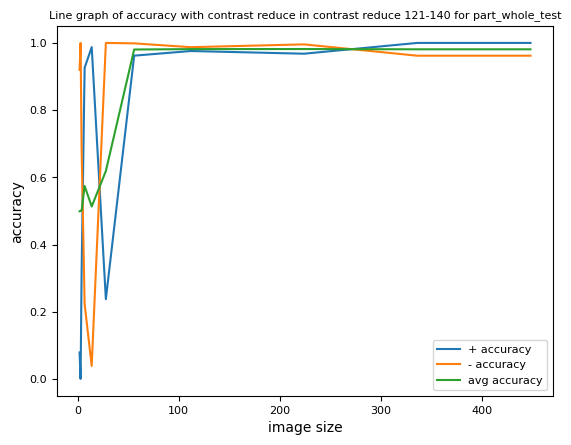

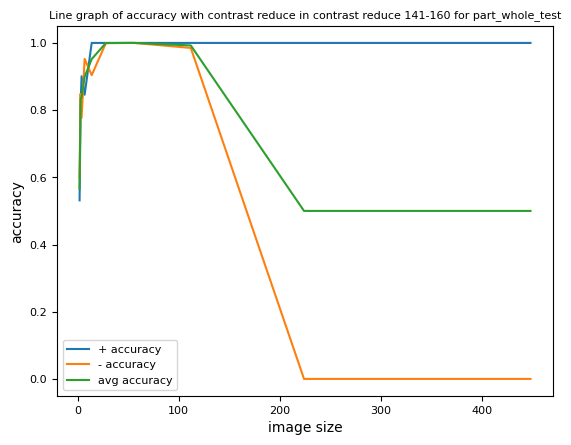

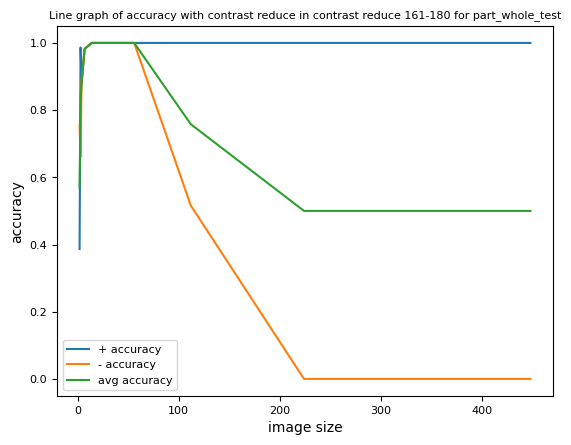

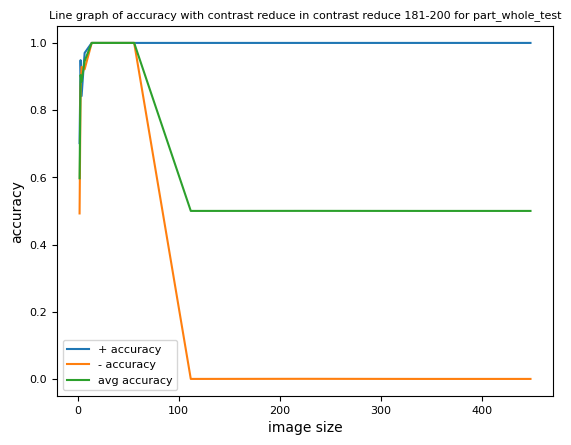

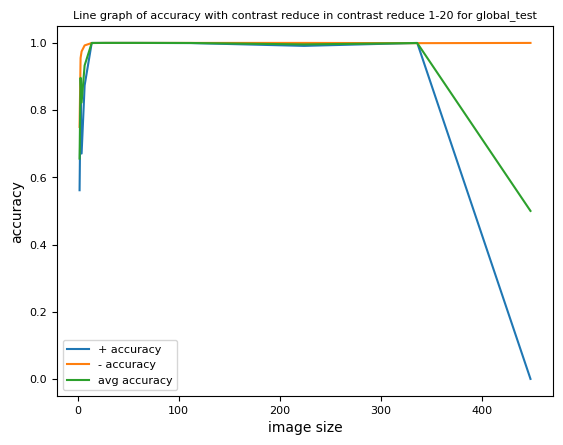

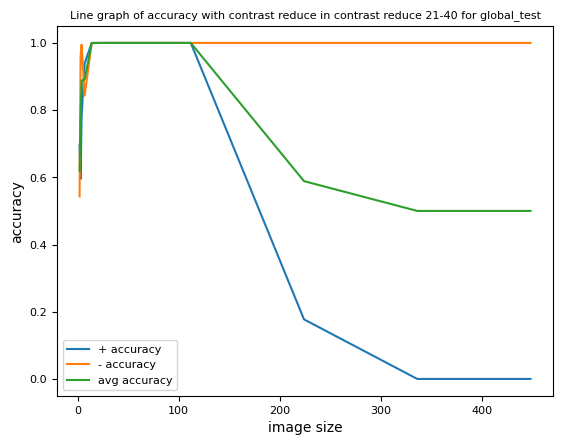

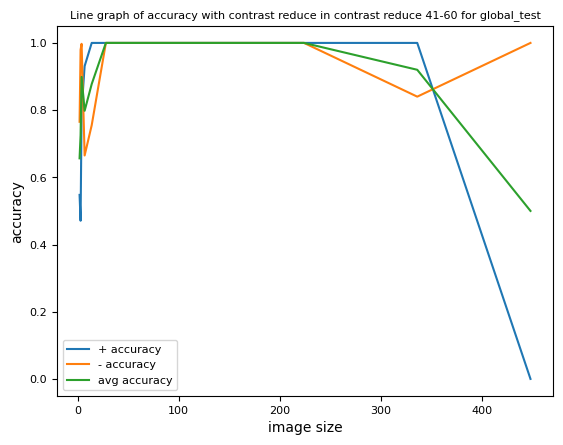

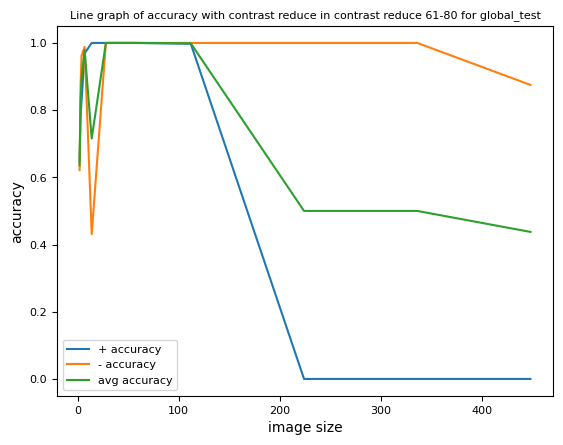

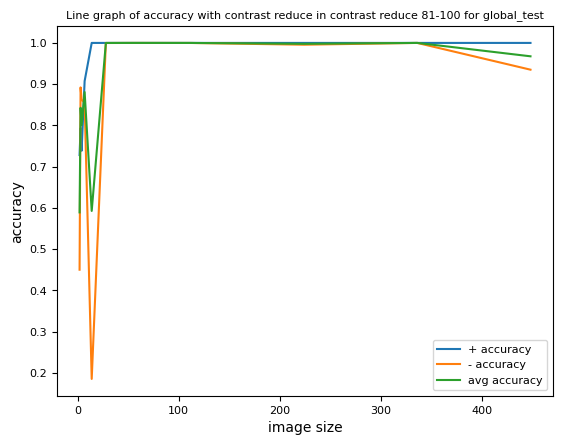

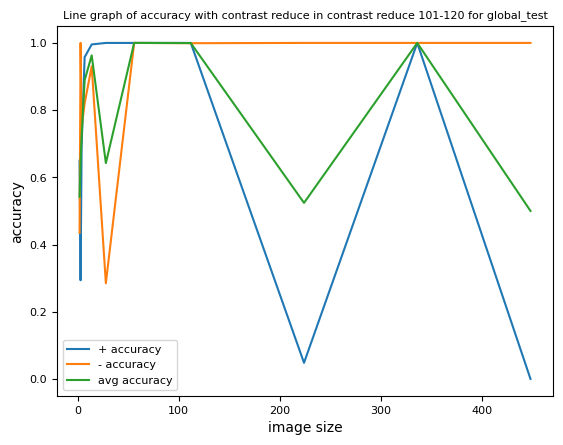

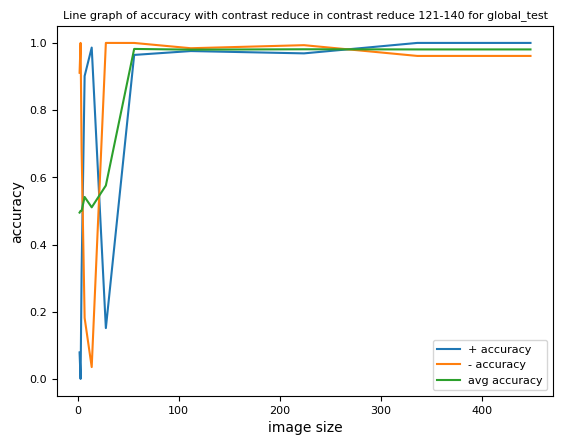

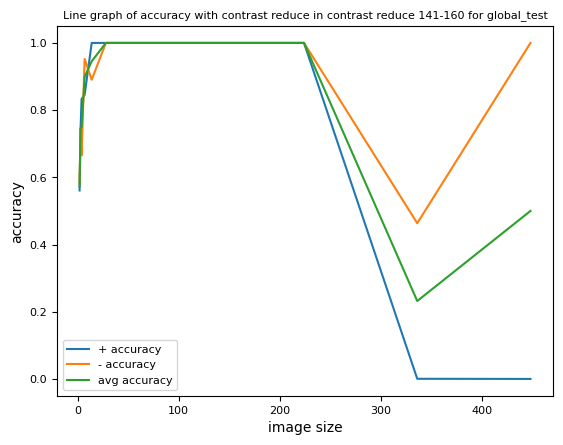

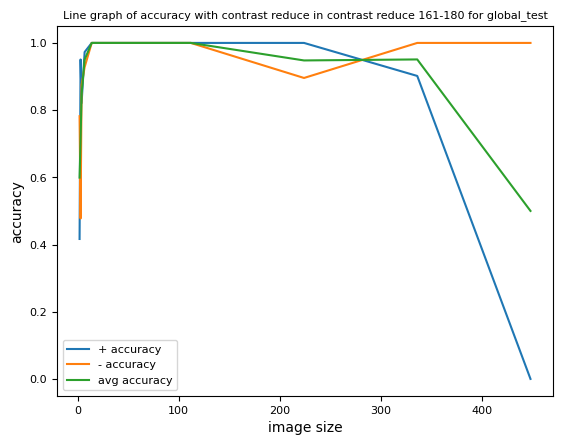

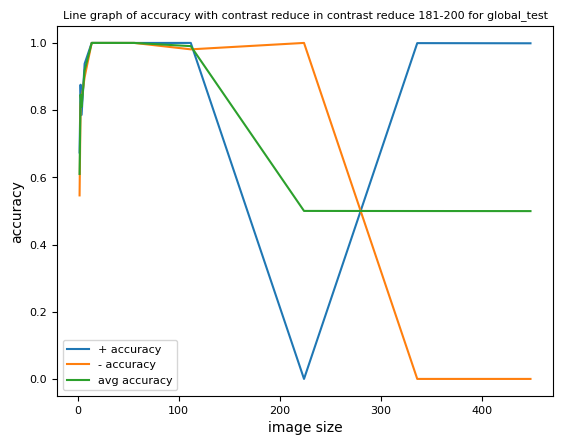

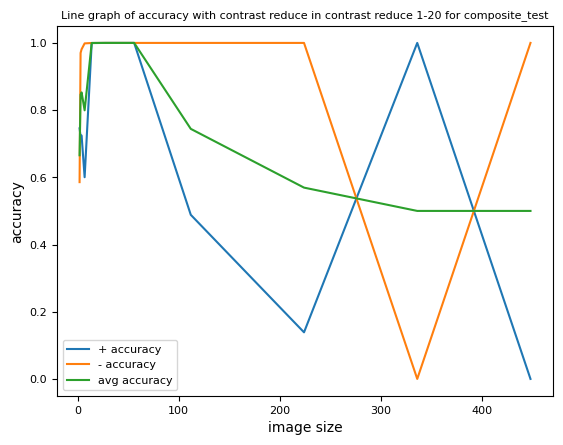

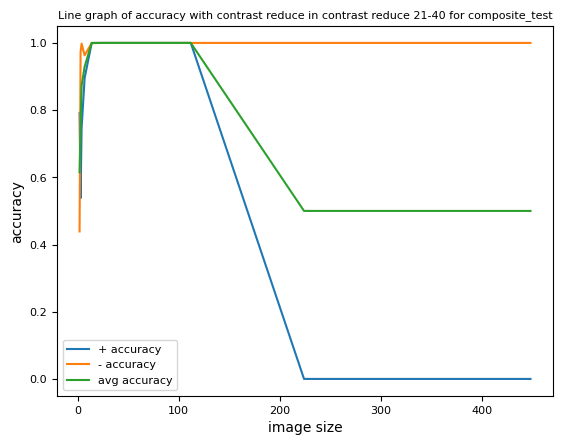

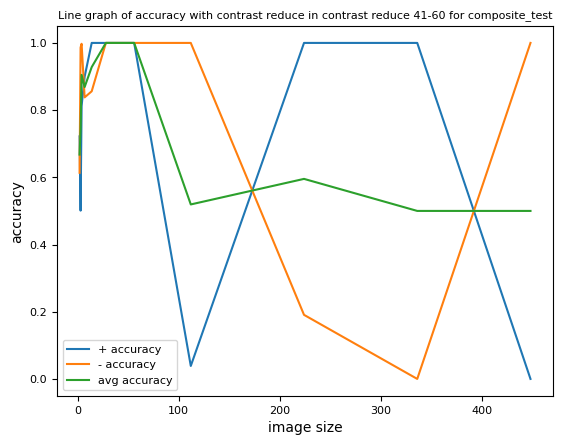

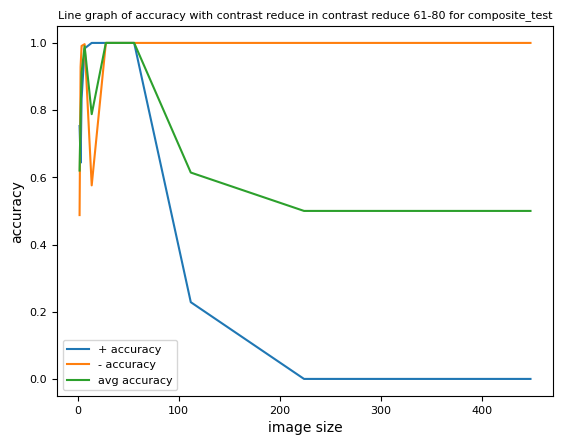

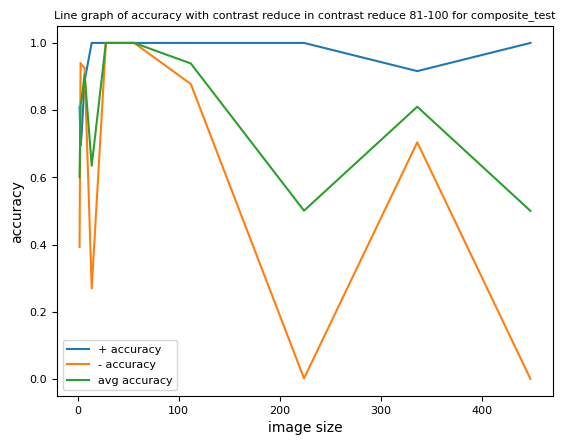

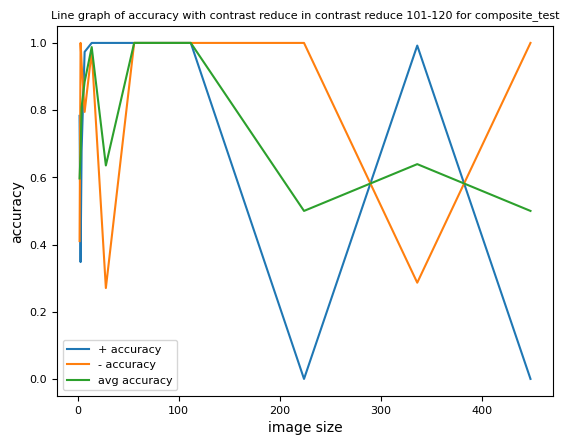

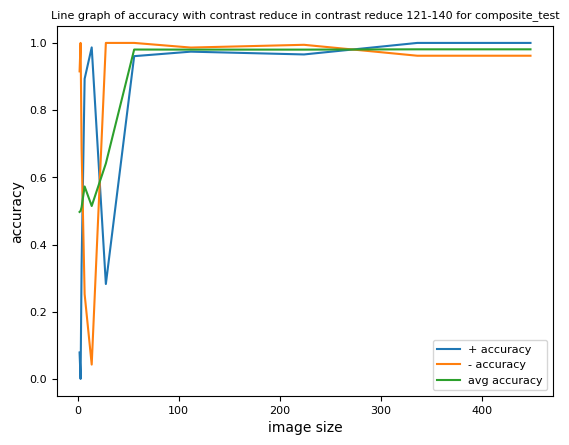

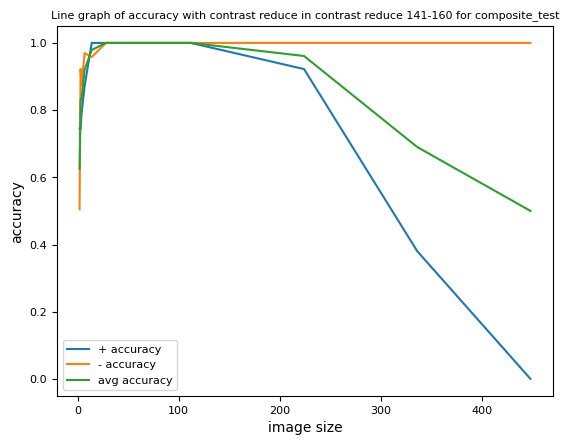

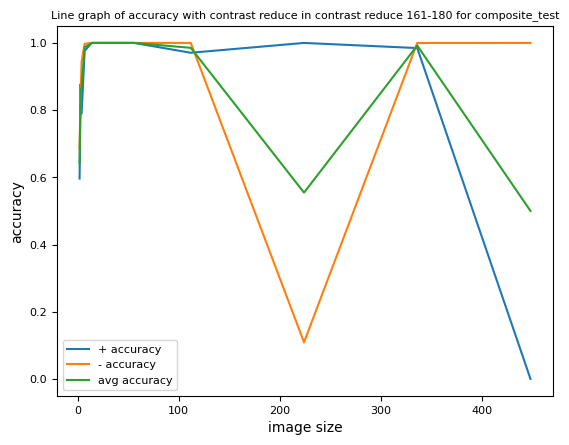

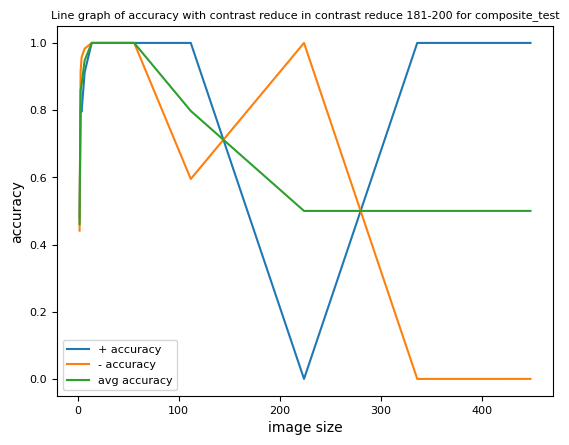

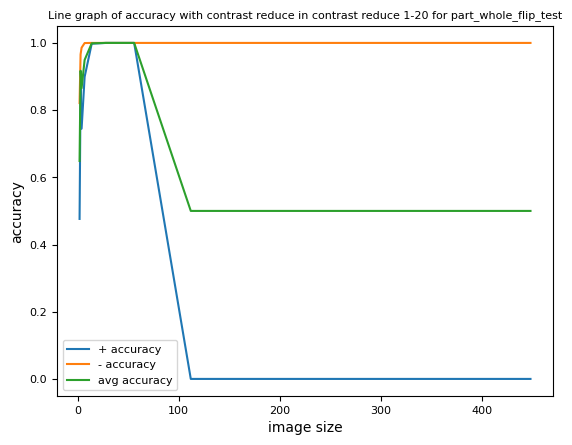

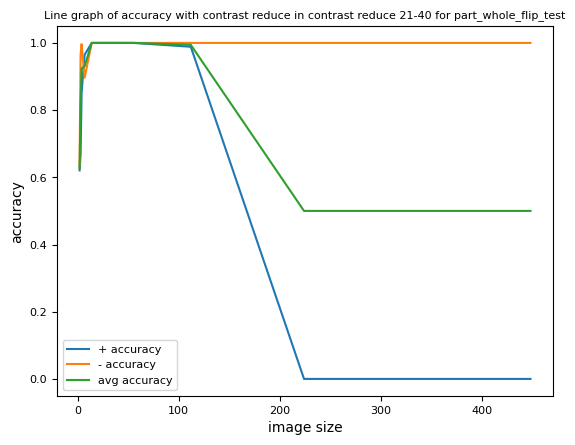

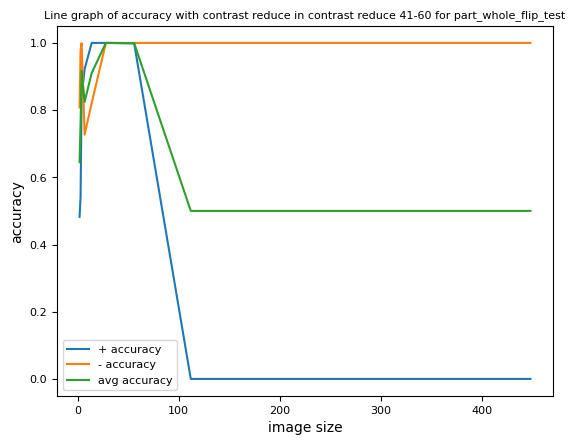

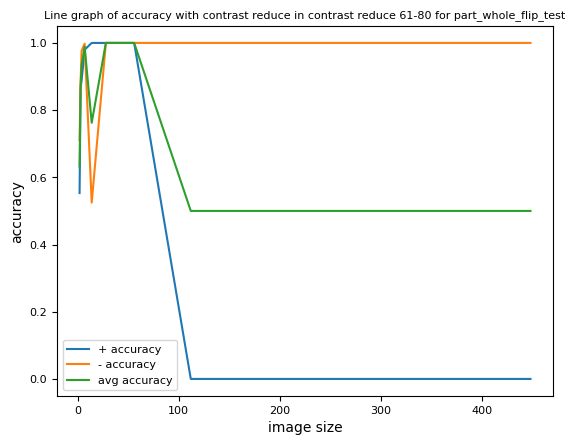

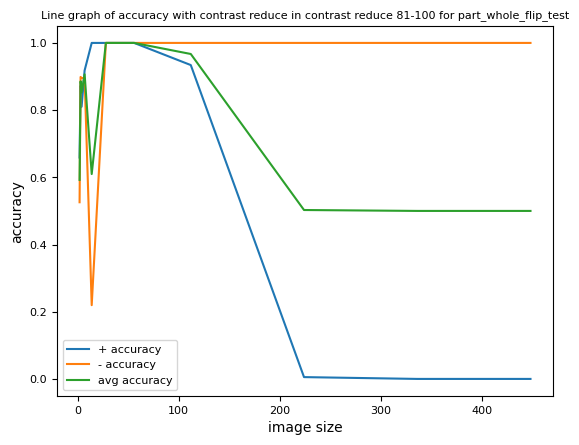

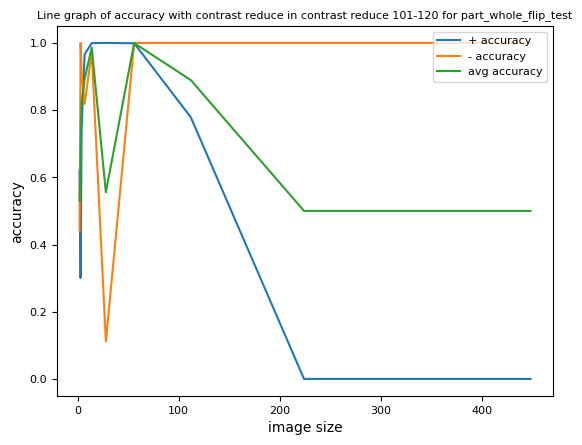

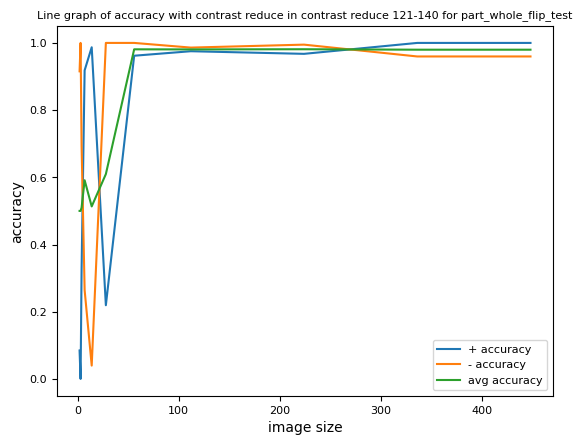

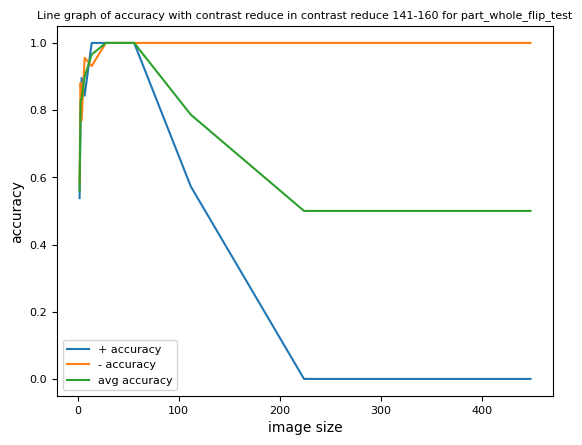

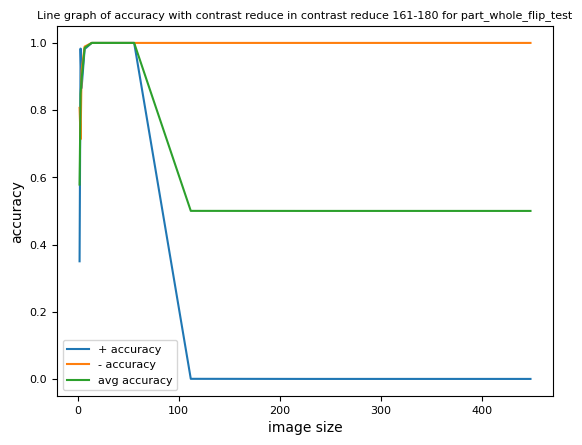

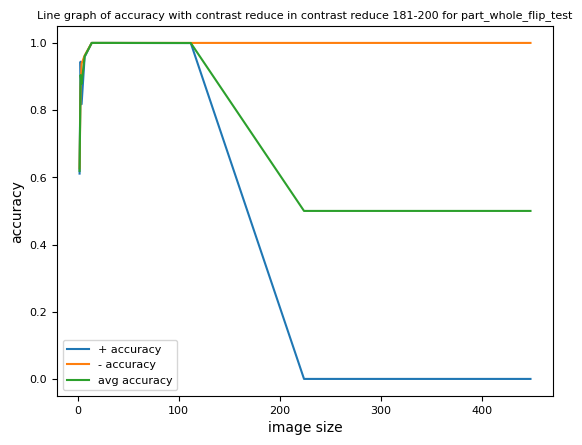

In [20]:
output_folder = "analysis_visual/resnet18/origin_data/image_size/"
Path(output_folder).mkdir(parents=True, exist_ok=True)
for test in test_list:
    for contract_reduce in contract_reduce_list:
        test_contrast_reduce_data = data[(data.test == test) & (data['contrast reduce'] == contract_reduce)]
        # plt.plot(test_image_size_data['contract reduce'], test_image_size_data['+ accuracy'], label= f'image size = {image_size}')
        test_contrast_reduce_data=test_contrast_reduce_data.sort_values(['image size'])
        plt.plot(test_contrast_reduce_data['image size'], test_contrast_reduce_data['+ accuracy'], label= '+ accuracy')
        plt.plot(test_contrast_reduce_data['image size'], test_contrast_reduce_data['- accuracy'], label= '- accuracy')
        plt.plot(test_contrast_reduce_data['image size'], test_contrast_reduce_data['avg accuracy'], label= 'avg accuracy')
        plt.xlabel('image size') 
        plt.ylabel('accuracy') 
        plt.title(f"Line graph of accuracy with contrast reduce in contrast reduce {contract_reduce} for {test}")
        plt.legend()
        output_path = output_folder+f"resnet18_{test}_cr{contract_reduce}_bs4_e10_resize0.5.png"
        plt.savefig(output_path)
        plt.show()